# Wind power forecasting for the day-ahead energy market
## ENS Data Challenge 2020

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.wind_utils import DataLoader
from utils.CAPE_CNR_metric import CAPE_CNR_function
from utils.wind_farm_models import WindFarmModel

plt.style.use('seaborn')

seed = 0

### Load data

In [2]:
dl = DataLoader()

time='2020-12-10 23:57:05,917' level=INFO event={"message": "Loading datasets"}
time='2020-12-10 23:57:06,887' level=INFO event={"message": "X_train loaded"}
time='2020-12-10 23:57:06,901' level=INFO event={"message": "y_train loaded"}
time='2020-12-10 23:57:07,426' level=INFO event={"message": "X_test loaded"}
time='2020-12-10 23:57:07,643' level=INFO event={"message": "Complementary_data loaded"}


In [3]:
X_train = dl.X_train
y_train = dl.y_train
X_test = dl.X_test
complementary_data = dl.complementary_data

### Model specific parameter and algo hyperparameters

In [4]:
feat_eng_parameters_dict = {
    'WF1':{
        'k': 1,
        'n_lags': 3
    },
    'WF2':{
        'k': 1,
        'n_lags': 3
    },
    'WF3':{
        'k': 1,
        'n_lags': 3
    },
    'WF4':{
        'k': 1,
        'n_lags': 3
    },
    'WF5':{
        'k': 1,
        'n_lags': 3
    },
    'WF6':{
        'k': 1,
        'n_lags': 3
    },
}

algo_hyperparameters_dict = {
    'RandomForest':{
        'WF1': {
            'n_estimators':1000,
            'max_depth':4,
        },
        'WF2': {
            'n_estimators':1000,
            'max_depth':4,
        },
        'WF3': {
            'n_estimators':1000,
            'max_depth':4,
        },
        'WF4': {
            'n_estimators':1000,
            'max_depth':4,
        },
        'WF5': {
            'n_estimators':1000,
            'max_depth':4,
        },
        'WF6': {
            'n_estimators':1000,
            'max_depth':4,
        }
        
    },
    
    'XGBoost': {
        'WF1': {
            'reg_alpha': 1.0,
            'n_estimators': 1000,
            'max_depth': 2
        },
        'WF2': {
            'reg_alpha': 0.001,
            'n_estimators': 500,
            'max_depth': 4
        },
        'WF3': {
            'reg_alpha': 0.001,
            'n_estimators': 1000,
            'max_depth': 1
        },
        'WF4': {
            'reg_alpha': 0.001,
            'n_estimators': 1000,
            'max_depth': 2
        },
        'WF5': {
            'reg_alpha': 0.001,
            'n_estimators': 1000,
            'max_depth': 3
        },
        'WF6': {
            'reg_alpha': 0.001,
            'n_estimators': 1000,
            'max_depth': 2
        }, 
    }
}

### Model validation

In [5]:
len_test = 1000

In [6]:
wf_dict = {}
for w_idx in range(1, 7):
    wf = f'WF{w_idx}'
    print(wf)

    #Build dataset
    data = X_train[X_train['WF']==wf].drop(['WF'], axis=1)
    data['Time'] = pd.to_datetime(data['Time'], dayfirst=True)
    data = data.set_index('Time')

    #Create training set
    data_train = data.head(len(data)-len_test)

    #Create validation set
    data_validation = data.tail(len_test)
    X_sub_val = data_validation.drop(['Production'], axis=1)
    y_sub_val = data_validation['Production']

    #Instantiate WindFarmModel
    model = WindFarmModel(
        train_data=data_train,
        target='Production',
        feat_eng_parameters={
            **feat_eng_parameters_dict[wf]

        },
        algo_hyperparams={
            'x_boost': {
                **algo_hyperparameters_dict['XGBoost'][wf],
                'learning_rate':0.01,
                'min_child_weight':0,
                'gamma':0,
                'subsample':0.7,
                'colsample_bytree':0.7,
                'objective':'reg:linear',
                'nthread':-1,
                'scale_pos_weight':1,
                'seed':seed,
                'verbosity':0,
                'booster':'gbtree',
                'random_state':seed
            },
            'rf': {
                **algo_hyperparameters_dict['RandomForest'][wf],
                'random_state':seed
            }
        }
    )
    
    #Run model on training set
    model.run_model()
    
    #Prediction
    predictions_train = model.prediction_pipeline.predict(
        data_train.drop(['Production'], axis=1)
    )
    predictions_val = model.prediction_pipeline.predict(X_sub_val)
    
    #Compute scores
    score_train = CAPE_CNR_function(
        model.y,
        predictions_train.prediction
    )
    score_val = CAPE_CNR_function(
        y_sub_val,
        predictions_val.prediction
    )
    
    #Update dict
    wf_dict.update(
        {
            f'WF{w_idx}': {
                'score_train': score_train,
                'score_val': score_val,
                'y_train': model.y,
                'pred_train': predictions_train,
                'y_val': y_sub_val,
                'pred_val': predictions_val,
            }
        }
    )

WF1


time='2020-12-10 23:57:08,761' level=INFO event={"message": "Load wind farm data"}
time='2020-12-10 23:57:08,768' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-10 23:57:08,769' level=INFO event={"message": "Training model"}
time='2020-12-10 23:57:44,486' level=INFO event={"message": "Model trained"}


WF2


time='2020-12-10 23:57:46,513' level=INFO event={"message": "Load wind farm data"}
time='2020-12-10 23:57:46,519' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-10 23:57:46,521' level=INFO event={"message": "Training model"}
time='2020-12-10 23:58:22,007' level=INFO event={"message": "Model trained"}


WF3


time='2020-12-10 23:58:23,858' level=INFO event={"message": "Load wind farm data"}
time='2020-12-10 23:58:23,862' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-10 23:58:23,863' level=INFO event={"message": "Training model"}
time='2020-12-10 23:58:55,884' level=INFO event={"message": "Model trained"}


WF4


time='2020-12-10 23:58:57,396' level=INFO event={"message": "Load wind farm data"}
time='2020-12-10 23:58:57,399' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-10 23:58:57,400' level=INFO event={"message": "Training model"}
time='2020-12-10 23:59:31,092' level=INFO event={"message": "Model trained"}


WF5


time='2020-12-10 23:59:32,751' level=INFO event={"message": "Load wind farm data"}
time='2020-12-10 23:59:32,754' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-10 23:59:32,756' level=INFO event={"message": "Training model"}
time='2020-12-11 00:00:07,039' level=INFO event={"message": "Model trained"}


WF6


time='2020-12-11 00:00:08,620' level=INFO event={"message": "Load wind farm data"}
time='2020-12-11 00:00:08,624' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-11 00:00:08,625' level=INFO event={"message": "Training model"}
time='2020-12-11 00:00:40,827' level=INFO event={"message": "Model trained"}


### Visualize predictions

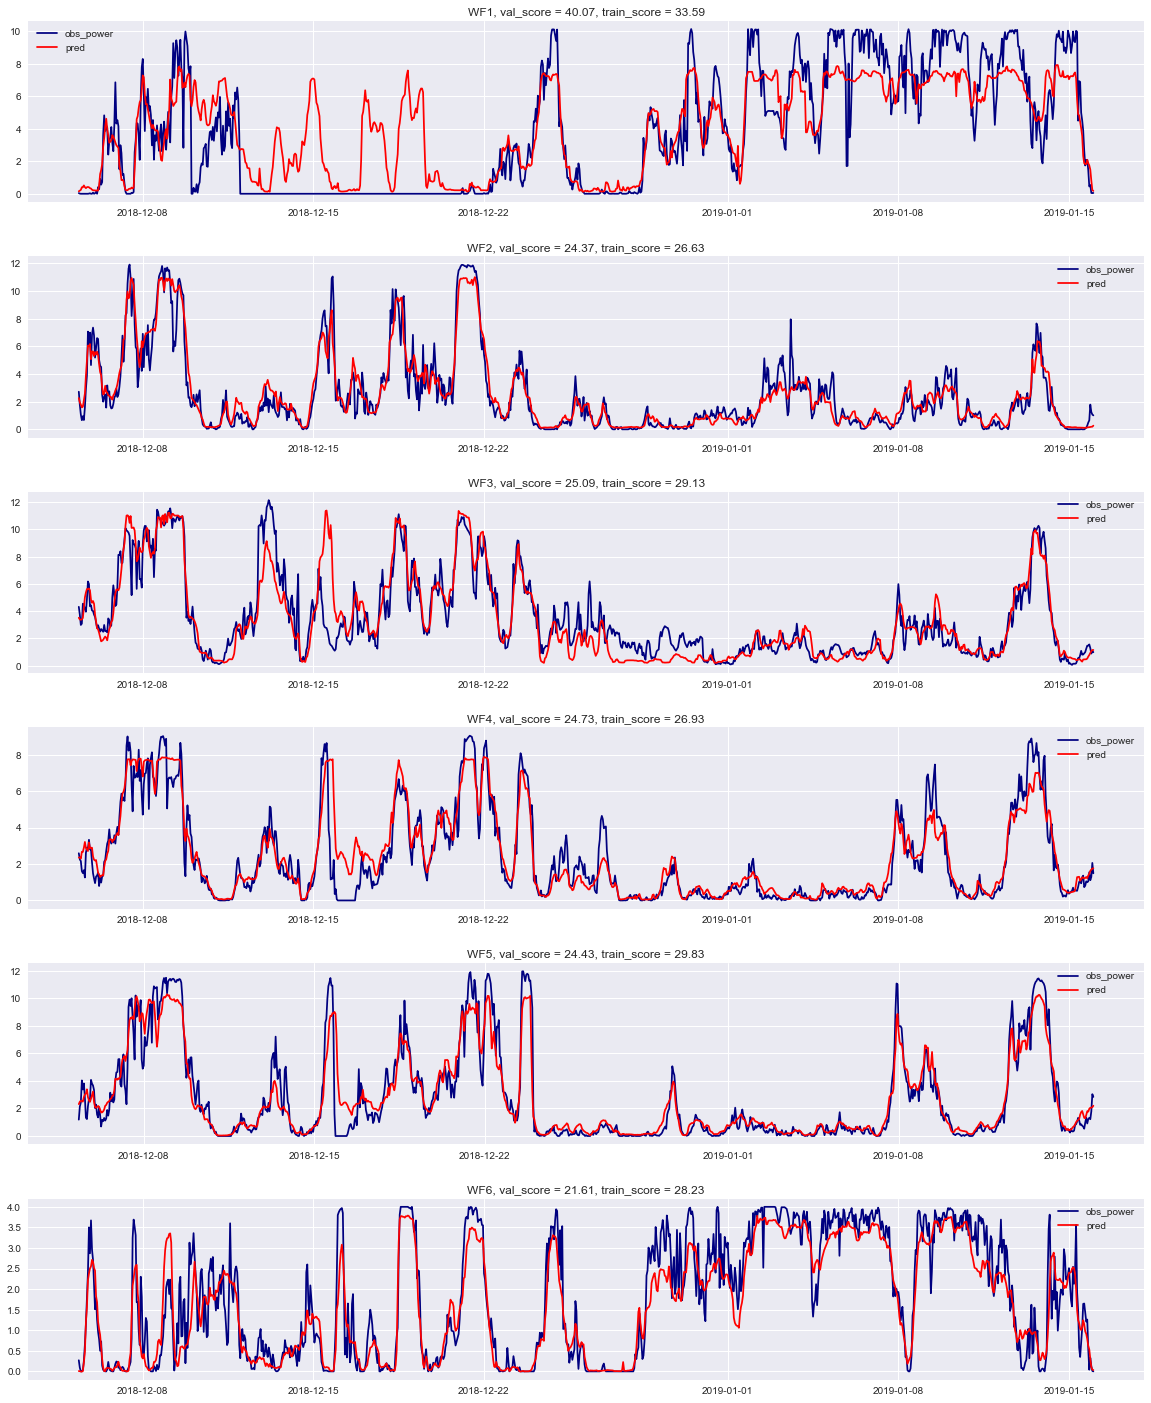

In [7]:
n_rows = 6
n_cols = 1
n_plots = n_rows * n_cols

fig = plt.figure(figsize=(20,25))
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i in range(n_plots):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    
    ax.plot(
        wf_dict[f'WF{i+1}']['y_val'],
        color='navy',
        label='obs_power'
    )
    ax.plot(
        pd.Series(
            wf_dict[f'WF{i+1}']['pred_val'].prediction,
            index=wf_dict[f'WF{i+1}']['y_val'].index
        ),
        color='red',
        label='pred'
    )
    tr_sc = '{:.2f}'.format(wf_dict[f'WF{i+1}']['score_train'])
    v_sc = '{:.2f}'.format(wf_dict[f'WF{i+1}']['score_val'])
    
    '{:.2f}'.format(wf_dict[f'WF{i+1}']['score_train'])
    plt.title(f'WF{i+1}, val_score = {v_sc}, train_score = {tr_sc}', size=12)
    plt.legend()

### Model residuals

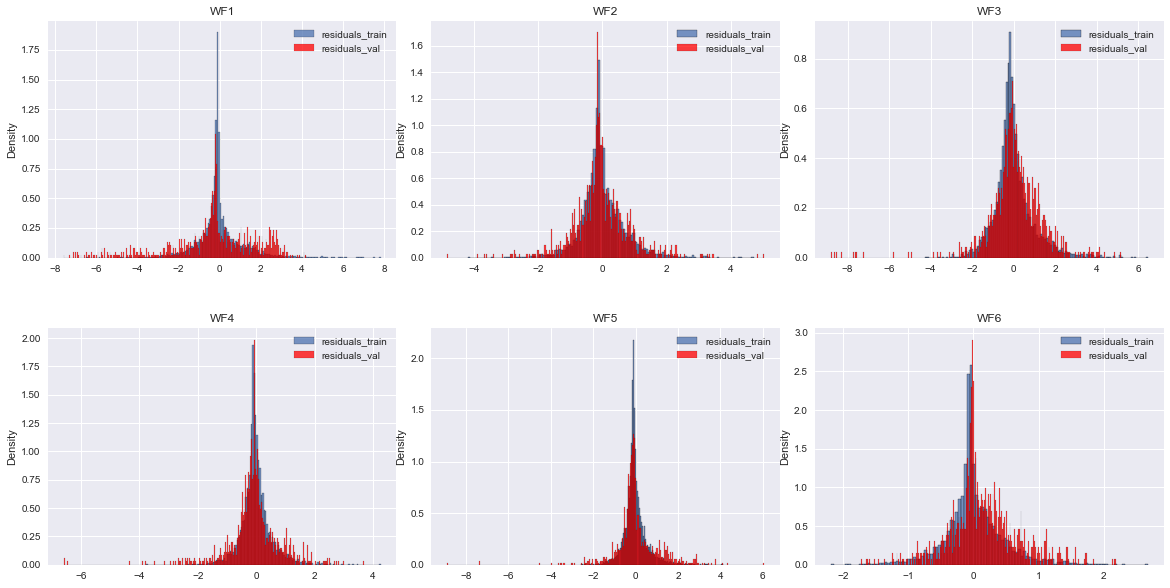

In [8]:
n_rows = 2
n_cols = 3
n_plots = n_rows * n_cols

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i in range(n_plots):
    ax = fig.add_subplot(n_rows, n_cols, i+1)

    y_train = wf_dict[f'WF{i+1}']['y_train']
    pred_train = wf_dict[f'WF{i+1}']['pred_train']
    residuals_train = y_train - pred_train.prediction

    y_val = wf_dict[f'WF{i+1}']['y_val']
    pred_val = wf_dict[f'WF{i+1}']['pred_val']
    residuals_val = y_val - pred_val.prediction

    sns.histplot(residuals_train, label='residuals_train', stat='density')
    sns.histplot(residuals_val, label='residuals_val', color='red', bins=300, stat='density')
    
    plt.title(f'WF{i+1}', size=12)
    plt.legend()

### Predictions and submission

In [10]:
pred_dict = {}
for i in range(1, 7):
    print(f'WF{i}')
    train = X_train[X_train['WF']==f'WF{i}'].drop(['WF'], axis=1)
    train['Time'] = pd.to_datetime(train['Time'], dayfirst=True)
    train = train.set_index('Time')
    
    test = X_test[X_test['WF']==f'WF{i}'].drop(['WF'], axis=1)
    test['Time'] = pd.to_datetime(test['Time'], dayfirst=True)
    test = test.set_index('Time')
    
    model = WindFarmModel(
        train_data=train,
        target='Production',
        feat_eng_parameters={
            **feat_eng_parameters_dict[wf]

        },
        algo_hyperparams={
            'x_boost': {
                **algo_hyperparameters_dict['XGBoost'][wf],
                'learning_rate':0.01,
                'min_child_weight':0,
                'gamma':0,
                'subsample':0.7,
                'colsample_bytree':0.7,
                'objective':'reg:linear',
                'nthread':-1,
                'scale_pos_weight':1,
                'seed':seed,
                'verbosity':0,
                'booster':'gbtree',
                'random_state':seed
            },
            'rf': {
                **algo_hyperparameters_dict['RandomForest'][wf],
                'random_state':seed
            }
        }
    )
    
    model.run_model()
    
    predictions = model.prediction_pipeline.predict(test)

    pred_dict.update({f'WF{i}': predictions.prediction})

WF1


time='2020-12-11 00:01:16,399' level=INFO event={"message": "Load wind farm data"}
time='2020-12-11 00:01:16,404' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-11 00:01:16,406' level=INFO event={"message": "Training model"}
time='2020-12-11 00:01:56,099' level=INFO event={"message": "Model trained"}


WF2


time='2020-12-11 00:01:58,096' level=INFO event={"message": "Load wind farm data"}
time='2020-12-11 00:01:58,100' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-11 00:01:58,102' level=INFO event={"message": "Training model"}
time='2020-12-11 00:02:37,105' level=INFO event={"message": "Model trained"}


WF3


time='2020-12-11 00:02:39,092' level=INFO event={"message": "Load wind farm data"}
time='2020-12-11 00:02:39,096' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-11 00:02:39,097' level=INFO event={"message": "Training model"}
time='2020-12-11 00:03:18,754' level=INFO event={"message": "Model trained"}


WF4


time='2020-12-11 00:03:20,960' level=INFO event={"message": "Load wind farm data"}
time='2020-12-11 00:03:20,964' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-11 00:03:20,966' level=INFO event={"message": "Training model"}
time='2020-12-11 00:04:03,674' level=INFO event={"message": "Model trained"}


WF5


time='2020-12-11 00:04:05,959' level=INFO event={"message": "Load wind farm data"}
time='2020-12-11 00:04:05,965' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-11 00:04:05,967' level=INFO event={"message": "Training model"}
time='2020-12-11 00:04:46,182' level=INFO event={"message": "Model trained"}


WF6


time='2020-12-11 00:04:48,444' level=INFO event={"message": "Load wind farm data"}
time='2020-12-11 00:04:48,448' level=INFO event={"message": "Wind farm data loaded"}
time='2020-12-11 00:04:48,450' level=INFO event={"message": "Training model"}
time='2020-12-11 00:05:29,069' level=INFO event={"message": "Model trained"}


In [11]:
predictions = np.concatenate(
    [
        pred_dict['WF1'],
        pred_dict['WF2'],
        pred_dict['WF3'],
        pred_dict['WF4'],
        pred_dict['WF5'],
        pred_dict['WF6']
    ]
)

predictions_final = np.where(
    predictions<0,
    0,
    predictions
)

output = pd.DataFrame(
    {
        'ID': X_test['ID'],
         'Production': predictions_final
    }
)

output.to_csv('submission_wind_44.csv', index=False)
print("OK!")

OK!
